<a href="https://colab.research.google.com/github/harshmalik2001/Weatherwise-Harsh-Malik/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [14]:
#installing necessary packages
!pip install pyinputplus matplotlib requests


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=10d8f7dcd89465a8b3c7b0469c5a6c4edc78bfa9faff153231794a76a0ed4da0
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=8dab74520f2c8f79a931201ffc5428c005e0b78486b7fb961bb409b251e1fc88
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

Import required packages and setup environment.


In [16]:
import os
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip



## 🌤️ Weather Data Functions

In [36]:
# Define get_weather_data() function here

def get_weather_data(location, forecast_days):
    """
    Fetches weather data of  a particular city and forecast_days as arguements
    - In the get_weather_data() function we build a api url using the city name
    for example("Perth)
    - The other arguement apart from the city is the number of forecast days
    for which we have to observe the weather
    -   Sends the get request to wttr from which we receive the data in JSON format
    """
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        data['weather'] = data['weather'][:forecast_days]
        return data
    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

# Example usage:
weather = get_weather_data("Perth", 3)
print(weather)


{'current_condition': [{'FeelsLikeC': '25', 'FeelsLikeF': '77', 'cloudcover': '75', 'humidity': '57', 'localObsDateTime': '2025-10-16 11:11 AM', 'observation_time': '03:11 AM', 'precipInches': '0.0', 'precipMM': '0.0', 'pressure': '1018', 'pressureInches': '30', 'temp_C': '23', 'temp_F': '74', 'uvIndex': '7', 'visibility': '10', 'visibilityMiles': '6', 'weatherCode': '116', 'weatherDesc': [{'value': 'Partly cloudy'}], 'weatherIconUrl': [{'value': ''}], 'winddir16Point': 'W', 'winddirDegree': '280', 'windspeedKmph': '13', 'windspeedMiles': '8'}], 'nearest_area': [{'areaName': [{'value': 'Perth'}], 'country': [{'value': 'Australia'}], 'latitude': '-31.933', 'longitude': '115.833', 'population': '1896548', 'region': [{'value': 'Western Australia'}], 'weatherUrl': [{'value': ''}]}], 'request': [{'query': 'Lat -31.95 and Lon 115.86', 'type': 'LatLon'}], 'weather': [{'astronomy': [{'moon_illumination': '27', 'moon_phase': 'Waning Crescent', 'moonrise': '02:50 AM', 'moonset': '01:42 PM', 'sun

In [31]:
weather_data = get_weather_data("Perth",5)
print(weather_data.keys())
# knowing the keys of the data returned from wttr request in JSON format so that we can know the thype of labels or keys the JSON data have

dict_keys(['current_condition', 'nearest_area', 'request', 'weather'])


## 📊 Visualisation Functions

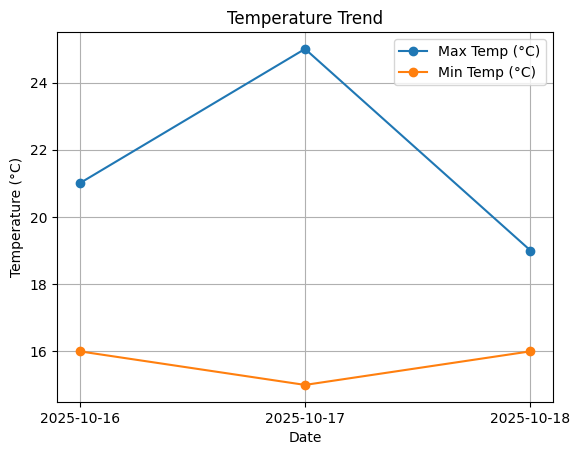

In [58]:
   def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    This chunk of code visualizes the temperature data it will have the weather_data from the get_weather_data() function and the
    output_type is set as display to display the chart in the notebook itself
    """
    days = []
    max_temps = []
    min_temps = []
    for day in weather_data['weather']:
        days.append(day['date'])
        max_temps.append(float(day['maxtempC']))
        min_temps.append(float(day['mintempC']))
    fig, ax = plt.subplots()
    ax.plot(days, max_temps, label='Max Temp (°C)', marker='o')
    ax.plot(days, min_temps, label='Min Temp (°C)', marker='o')
    ax.set_title('Temperature Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    plt.grid(True)
    if output_type == 'figure':
        return fig
    else:
        plt.show()

data = get_weather_data("Perth", 3)
create_temperature_visualisation(data)


In [44]:
# Precipitation Visualisation Function
def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.
    This chunk of code visualizes the precipitation data it will have the weather_data from the get_weather_data() function and the
    output_type is set as display to display the chart in the notebook itself
    """
    days = []
    precip = []
    for day in weather_data['weather']:
        days.append(day['date'])
        # Sum up all hourly precipitation for the day
        total_precip = sum(float(hour['precipMM']) for hour in day['hourly'])
        precip.append(total_precip)
    fig, ax = plt.subplots()
    ax.bar(days, precip, color='skyblue')
    ax.set_title('Precipitation Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel('Precipitation (mm)')
    plt.grid(True)
    if output_type == 'figure':
        return fig
    else:
        plt.show()



## 🤖 Natural Language Processing

{'location': 'perth', 'attribute': 'temperature', 'time_period': 'today'}


## 🧭 User Interface

## 🧩 Main Application Logic

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

In Perth on 2025-10-17, the temperature will range from 15°C to 25°C.


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.